In [52]:
# Practice getting NFL data and making data tables

In [53]:
from sportsipy.nfl.schedule import Schedule
from sportsipy.nfl.teams import Teams
import pandas as pd
from sportsipy.nfl.boxscore import Boxscores, Boxscore
from datetime import date
import requests
from bs4 import BeautifulSoup
import re
import keras
import seaborn as sns
import sports

In [54]:
teams = Teams()
df = pd.DataFrame(columns = ['Name', 'Abbreviation', 'Penalties', 'Wins', 'Pass Attempts', 'Rush Attempts', 'First Downs',
                            'Turnovers', 'Strength of Schedule', 'Rushing Yards', 'Passing Yards', 'Fumbles', 'Interceptions'])

df['Name'] = [x.name for x in teams]
df['Abbreviation'] = [x.abbreviation for x in teams]
df['Wins'] = [x.wins for x in teams]
df['Penalties'] = [x.penalties for x in teams]
df['Pass Attempts'] = [x.pass_attempts for x in teams]
df['Rush Attempts'] = [x.rush_attempts for x in teams]
df['First Downs'] = [x.first_downs for x in teams]
df['Turnovers'] = [x.turnovers for x in teams]
df['Strength of Schedule'] = [x.strength_of_schedule for x in teams]
df['Rushing Yards'] = [x.rush_yards for x in teams]
df['Passing Yards'] = [x.pass_yards for x in teams]
df['Fumbles'] = [x.fumbles for x in teams]
df['Interceptions'] = [x.interceptions for x in teams]


In [55]:
correlation_data = df[['Wins', 'Pass Attempts', 'Rush Attempts', 'Penalties', 'Turnovers', 'First Downs', 'Strength of Schedule',
                  'Rushing Yards', 'Passing Yards', 'Fumbles', 'Interceptions']]
correlation_data.corr(method ='pearson')

,Wins,Pass Attempts,Rush Attempts,Penalties,Turnovers,First Downs,Strength of Schedule,Rushing Yards,Passing Yards,Fumbles,Interceptions
Wins,1.000000,0.213096,0.325707,-0.220640,-0.351941,0.718267,-0.159935,0.259267,0.674315,-0.155917,-0.335563
Pass Attempts,0.213096,1.000000,-0.511381,0.321573,0.231470,0.493582,0.121705,-0.402851,0.716487,0.092246,0.227641
Rush Attempts,0.325707,-0.511381,1.000000,-0.029756,-0.145895,0.329490,-0.095311,0.865231,-0.197401,-0.033246,-0.160264
Penalties,-0.220640,0.321573,-0.029756,1.000000,0.220149,0.100862,0.157627,0.009395,0.115020,0.082700,0.219900
Turnovers,-0.351941,0.231470,-0.145895,0.220149,1.000000,-0.055265,0.152136,-0.223816,-0.127181,0.605524,0.843916
First Downs,0.718267,0.493582,0.329490,0.100862,-0.055265,1.000000,-0.019084,0.452635,0.741454,0.015219,-0.079457
Strength of Schedule,-0.159935,0.121705,-0.095311,0.157627,0.152136,-0.019084,1.000000,-0.096290,-0.112720,0.049194,0.157329
Rushing Yards,0.259267,-0.402851,0.865231,0.009395,-0.223816,0.452635,-0.096290,1.000000,-0.132119,-0.049383,-0.246952
Passing Yards,0.674315,0.716487,-0.197401,0.115020,-0.127181,0.741454,-0.112720,-0.132119,1.000000,-0.106772,-0.087267
Fumbles,-0.155917,0.092246,-0.033246,0.082700,0.605524,0.015219,0.049194,-0.049383,-0.106772,1.000000,0.084069


<AxesSubplot:>

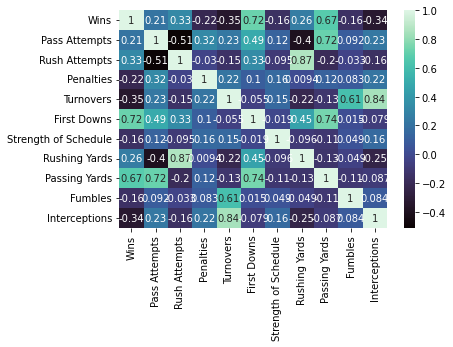

In [56]:
sns.heatmap(correlation_data.corr(), annot=True, cmap="mako")

In [57]:
# creating the date object of today's date
todays_date = date.today()

# web scrape CBS for current week
url = 'https://www.cbssports.com/nfl/schedule/'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")
results = soup.find(id="PageTitle-header").text
try:
    current_week = int(re.search(r'\d+', results).group())
except:
    print('Not in season')

games_today = Boxscores(current_week, todays_date.year)
# Prints a dictionary of all matchups for week 1 of 2017
# games_today = pd.DataFrame.from_dict(games_today.games)

In [58]:
current_schedule = pd.DataFrame(columns = ['Away Team', 'Home Team', 'Away Score', 'Home Score', 'Winner'])

In [59]:
game_date = []


for key in games_today.games.keys():
        current_schedule['Away Team'] =  [item['away_name'] for item in games_today.games[key]]
        current_schedule['Home Team'] =  [item['home_name'] for item in games_today.games[key]]
        current_schedule['Away Score'] =  [item['away_score'] for item in games_today.games[key]]
        current_schedule['Home Score'] =  [item['home_score'] for item in games_today.games[key]]
        current_schedule['Winner'] =  [item['winning_name'] for item in games_today.games[key]]
        game_date.extend(item['boxscore'] for item in games_today.games[key])

In [60]:
print(game_date) 

for i in range(len(game_date)):
    game_info = Boxscore(i)
    game_date[i] = game_info.date
    
print(game_date)     

['202112230oti', '202112250gnb', '202112250crd', '202112260phi', '202112260nyj', '202112260nwe', '202112260min', '202112260htx', '202112260cin', '202112260car', '202112260atl', '202112260sea', '202112260rai', '202112260kan', '202112260dal', '202112270nor']
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [61]:
history_of_seasons = pd.DataFrame(columns = ['Away Team', 'Home Team', 'Away Score', 'Home Score', 'Winner'])

In [66]:
year = todays_date.year
week = current_week-1
away = []
home = []
away_score = []
home_score = []
winner = []
weeks = []
years = []

while year >= todays_date.year-5:
    if year != todays_date.year: week = 16
    while week >= 1:
        previous_games = Boxscores(week, year)
        for key in previous_games.games.keys():
            away.extend(item['away_name'] for item in previous_games.games[key])
            home.extend(item['home_name'] for item in previous_games.games[key])
            away_score.extend(item['away_score'] for item in previous_games.games[key])
            home_score.extend(item['home_score'] for item in previous_games.games[key])
            winner.extend(item['winning_name'] for item in previous_games.games[key])
            for i in previous_games.games[key]: weeks.append(week)
            for i in previous_games.games[key]: years.append(year)
        week = week-1 
    year = year-1

In [79]:
home[:] = [x if x != 'Washington Redskins' else 'Washington Football Team' for x in home]
away[:] = [x if x != 'Washington Redskins' else 'Washington Football Team' for x in away]

home[:] = [x if x != 'Oakland Raiders' else 'Las Vegas Raiders' for x in home]
away[:] = [x if x != 'Oakland Raiders' else 'Las Vegas Raiders' for x in away]

history_of_seasons['Away Team'] =  away
history_of_seasons['Home Team'] =  home
history_of_seasons['Away Score'] = away_score
history_of_seasons['Home Score'] =  home_score
history_of_seasons['Winner'] =  winner
history_of_seasons['Week'] =  weeks
history_of_seasons['Season'] =  years

In [80]:
history_of_seasons

,Away Team,Home Team,Away Score,Home Score,Winner,Week,Season
0,Kansas City Chiefs,Los Angeles Chargers,34,28,Kansas City Chiefs,15,2021
1,New England Patriots,Indianapolis Colts,17,27,Indianapolis Colts,15,2021
2,Carolina Panthers,Buffalo Bills,14,31,Buffalo Bills,15,2021
3,Green Bay Packers,Baltimore Ravens,31,30,Green Bay Packers,15,2021
4,Tennessee Titans,Pittsburgh Steelers,13,19,Pittsburgh Steelers,15,2021
...,...,...,...,...,...,...,...
1419,Detroit Lions,Indianapolis Colts,39,35,Detroit Lions,1,2016
1420,New York Giants,Dallas Cowboys,20,19,New York Giants,1,2016
1421,New England Patriots,Arizona Cardinals,23,21,New England Patriots,1,2016
1422,Pittsburgh Steelers,Washington Football Team,38,16,Pittsburgh Steelers,1,2016
